In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
import pickle
import numpy as np
import os


In [4]:
file = open("metamorphosis_clean.txt", "r", encoding = "utf8")
lines = []

for i in file:
    lines.append(i)

print("The First Line: ", lines[0])
print("The Last Line: ", lines[-1])

The First Line:  ﻿One morning, when Gregor Samsa woke from troubled dreams, he found

The Last Line:  first to get up and stretch out her young body.


In [5]:
data = ""

for i in lines:
    data = ' '. join(lines)

data = data.replace('\n', '').replace('\r', '').replace('\ufeff', '')
data[:360]


'One morning, when Gregor Samsa woke from troubled dreams, he found himself transformed in his bed into a horrible vermin.  He lay on his armour-like back, and if he lifted his head a little he could see his brown belly, slightly domed and divided by arches into stiff sections.  The bedding was hardly able to cover it and seemed ready to slide off any moment.'

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
import string

translator = str.maketrans(string.punctuation, ' '*len(string.punctuation)) #map punctuation to space
new_data = data.translate(translator)

new_data[:500]

'One morning  when Gregor Samsa woke from troubled dreams  he found himself transformed in his bed into a horrible vermin   He lay on his armour like back  and if he lifted his head a little he could see his brown belly  slightly domed and divided by arches into stiff sections   The bedding was hardly able to cover it and seemed ready to slide off any moment   His many legs  pitifully thin compared with the size of the rest of him  waved about helplessly as he looked    What s happened to me   he'

In [8]:
z = []

for i in data.split():
    if i not in z:
        z.append(i)

data = ' '.join(z)
data[:500]

'One morning, when Gregor Samsa woke from troubled dreams, he found himself transformed in his bed into a horrible vermin. He lay on armour-like back, and if lifted head little could see brown belly, slightly domed divided by arches stiff sections. The bedding was hardly able to cover it seemed ready slide off any moment. His many legs, pitifully thin compared with the size of rest him, waved about helplessly as looked. "What\'s happened me?" thought. It wasn\'t dream. room, proper human room altho'

In [9]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts([data])

# saving the tokenizer for predict function.
pickle.dump(tokenizer, open('tokenizer1.pkl', 'wb'))

sequence_data = tokenizer.texts_to_sequences([data])[0]
sequence_data[:10]


[17, 53, 293, 2, 18, 729, 135, 730, 294, 8]

In [10]:
vocab_size = len(tokenizer.word_index) + 1
print(vocab_size)

2617


In [11]:
sequences = []

for i in range(1, len(sequence_data)):
    words = sequence_data[i-1:i+1]
    sequences.append(words)

print("The Length of sequences are: ", len(sequences))
sequences = np.array(sequences)
sequences[:10]

The Length of sequences are:  3889


array([[ 17,  53],
       [ 53, 293],
       [293,   2],
       [  2,  18],
       [ 18, 729],
       [729, 135],
       [135, 730],
       [730, 294],
       [294,   8],
       [  8, 731]])

In [12]:
X = []
y = []

for i in sequences:
    X.append(i[0])
    y.append(i[1])

X = np.array(X)
y = np.array(y)

In [13]:
print("The Data is: ", X[:5])
print("The responses are: ", y[:5])


The Data is:  [ 17  53 293   2  18]
The responses are:  [ 53 293   2  18 729]


In [14]:
y = to_categorical(y, num_classes=vocab_size)
y[:5]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [15]:
model = Sequential()
model.add(Embedding(vocab_size, 10, input_length=1))
model.add(LSTM(1000, return_sequences=True))
model.add(LSTM(1000))
model.add(Dense(1000, activation="relu"))
model.add(Dense(vocab_size, activation="softmax"))

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 1, 10)             26170     
                                                                 
 lstm (LSTM)                 (None, 1, 1000)           4044000   
                                                                 
 lstm_1 (LSTM)               (None, 1000)              8004000   
                                                                 
 dense (Dense)               (None, 1000)              1001000   
                                                                 
 dense_1 (Dense)             (None, 2617)              2619617   
                                                                 
Total params: 15694787 (59.87 MB)
Trainable params: 15694787 (59.87 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [18]:
from tensorflow import keras
from keras.utils.vis_utils import plot_model

keras.utils.plot_model(model, to_file='model.png', show_layer_names=True)

ModuleNotFoundError: ignored

In [19]:
import tensorflow as tf
from tensorflow import keras


name='logsnextword1'
log_dir = 'logs'
my_callbacks = [
    tf.keras.callbacks.ModelCheckpoint(filepath='nextword1.h5',
                                       monitor='loss',
                                       verbose=1,
                                       save_best_only=True,
                                       mode='auto'),
    tf.keras.callbacks.ReduceLROnPlateau(monitor='loss',
                                         factor=0.2,
                                         patience=3,
                                         min_lr=0.0001,
                                         verbose = 1),
]


In [20]:
optimizer = tf.keras.optimizers.legacy.Adam(learning_rate=0.001,)

model.compile(loss="categorical_crossentropy", optimizer=optimizer,run_eagerly=True)

In [ ]:
model.fit(X, y, epochs=150, batch_size=64, callbacks=my_callbacks)


Epoch 1/150
61/61 [==============================] - ETA: 0s - loss: 0.6455
Epoch 1: loss did not improve from 0.64451
61/61 [==============================] - 19s 307ms/step - loss: 0.6455 - lr: 1.0000e-04
Epoch 2/150
61/61 [==============================] - ETA: 0s - loss: 0.6451
Epoch 2: loss did not improve from 0.64451
61/61 [==============================] - 17s 285ms/step - loss: 0.6451 - lr: 1.0000e-04
Epoch 3/150
61/61 [==============================] - ETA: 0s - loss: 0.6450
Epoch 3: loss did not improve from 0.64451
61/61 [==============================] - 17s 285ms/step - loss: 0.6450 - lr: 1.0000e-04
Epoch 4/150
61/61 [==============================] - ETA: 0s - loss: 0.6450
Epoch 4: loss did not improve from 0.64451
61/61 [==============================] - 18s 299ms/step - loss: 0.6450 - lr: 1.0000e-04
Epoch 5/150
61/61 [==============================] - ETA: 0s - loss: 0.6451
Epoch 5: loss did not improve from 0.64451
61/61 [==============================] - 18s 287ms/st

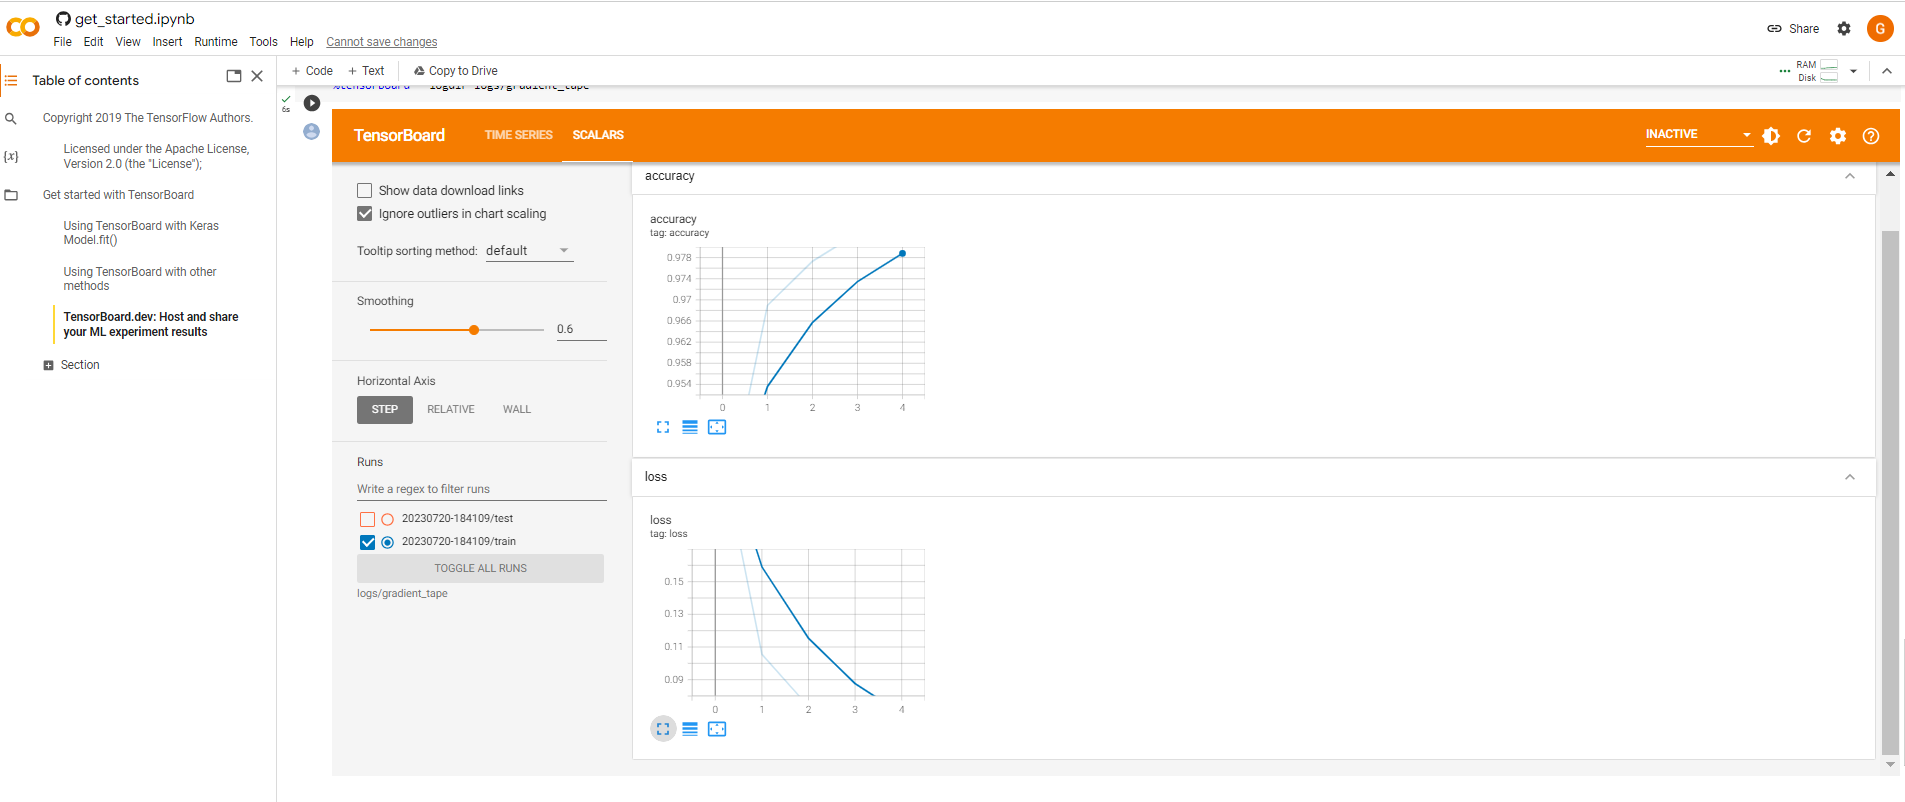

In [ ]:
from IPython.display import Image
pil_img = Image(filename='graph1.png')
display(pil_img)

In [ ]:
# Importing the Libraries

from tensorflow.keras.models import load_model
import numpy as np
import pickle

# Load the model and tokenizer

model = load_model('nextword1.h5')
tokenizer = pickle.load(open('tokenizer1.pkl', 'rb'))

def Predict_Next_Words(model, tokenizer, text):
    """
        In this function we are using the tokenizer and models trained
        and we are creating the sequence of the text entered and then
        using our model to predict and return the the predicted word.

    """
    preds = None
    for i in range(3):
        sequence = tokenizer.texts_to_sequences([text])[0]
        sequence = np.array(sequence)

         # Predict the next word using the model
        preds = model.predict(np.array([sequence]))

        # Get the top predicted word indices (the words with the highest probability)
        top_indices = np.argsort(preds[0])[-3:][::-1]

        # Convert the indices back to the words using the tokenizer's word index
        predicted_words = []
        for index in top_indices:
            for word, idx in tokenizer.word_index.items():
                if idx == index:
                    predicted_words.append(word)
                    break

        return predicted_words

In [ ]:
while(True):

    text = input("Enter your line: ")

    if text == "stop the script":
        print("Ending The Program.....")
        break

    else:
        try:
            text = text.split(" ")
            text = text[-1]

            text = ''.join(text)
            predictions = Predict_Next_Words(model, tokenizer, text)

            if predictions:
                print(predictions)
            else:
                print('not detected any words.')

        except Exception as e:
            continue

Enter your line: at the dull
1/1 [==============================] - 1s 1s/step
['weather', 'without', 'afraid']
